# # 🌸 Multinomial Logistic Regression on Iris Dataset
# This notebook implements Multinomial Logistic Regression using `scikit-learn` and evaluates it using accuracy, confusion matrix, classification report, and log loss.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss

# ## 📥 Load the Iris Dataset
# Using sklearn's built-in `load_iris()` method.

In [5]:
iris = load_iris()

In [6]:
# Create features (X) and labels (y)
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# %% [markdown]
# ## ✂️ Train-Test Split

In [7]:
# 80% for training, 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# ## 🚀 Train Multinomial Logistic Regression Model

In [8]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

C:\Users\sudha\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='multinomial')

# ## 🔮 Predictions

In [9]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# ## 📊 Evaluation Metrics

In [11]:
acc_score = accuracy_score(y_test, y_pred)
con_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
logloss = log_loss(y_test, y_proba)

In [ ]:
# 🖨️ Print All Metrics
print("✅ Accuracy:", acc_score)
print("\n📉 Confusion Matrix:\n", con_matrix)
print("\n📋 Classification Report:\n", class_report)
print("🔐 Log Loss:", logloss)

✅ Accuracy: 0.9666666666666667

📉 Confusion Matrix:
 [[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

🔐 Log Loss: 0.11243356563689931


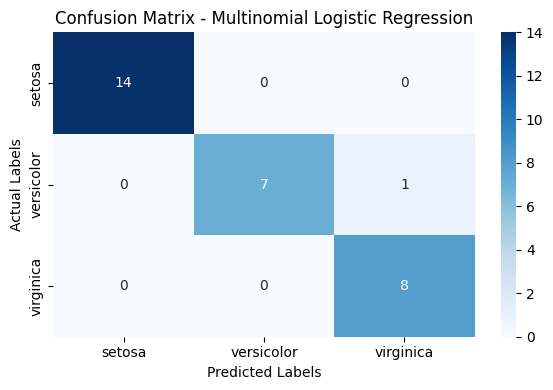

In [ ]:
# 🔥 Confusion Matrix Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(con_matrix,
            annot=True,
            cmap='Blues',
            fmt='d',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Multinomial Logistic Regression')
plt.tight_layout()
plt.show()

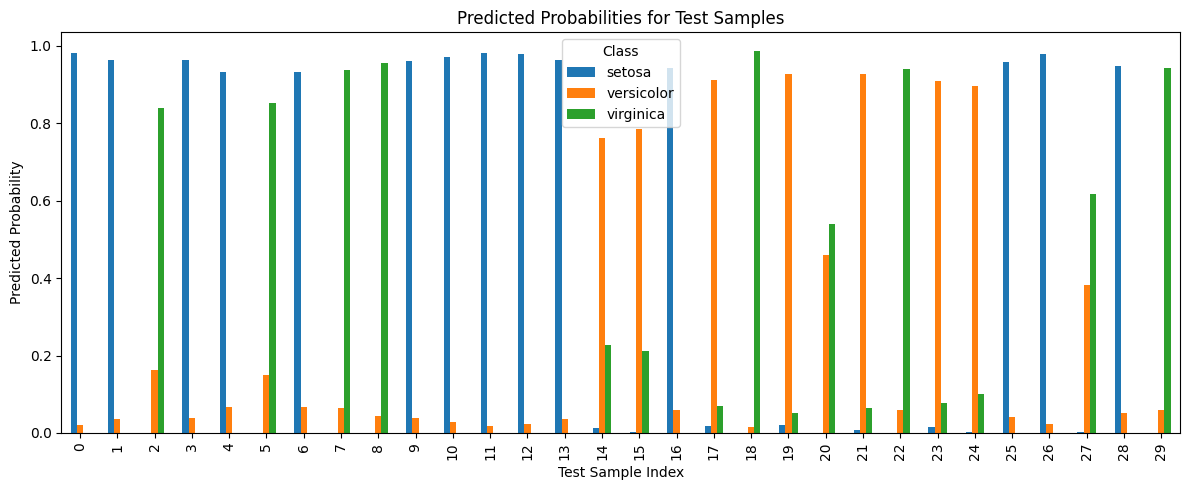

In [14]:
# 📈 Predicted Probabilities (Bar Plot)
proba_df = pd.DataFrame(y_proba, columns=iris.target_names)

proba_df.plot(kind='bar',
              figsize=(12, 5),
              title="Predicted Probabilities for Test Samples")
plt.xlabel('Test Sample Index')
plt.ylabel('Predicted Probability')
plt.legend(title='Class')
plt.tight_layout()
plt.show()